In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [3]:
df = pd.read_csv('data/lat_long.csv')
df.head()

,Unnamed: 0,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,...,Area of Residence,Geocode,Occupation,Travel History,Relationship with other patients,Remarks,Cluster,Combined Address,latitude,longitude
0,0,1,23/1/2020,21/1/2020,M,39,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,Kwai Tsing,"(22.3415435, 114.1338324)",NaN,NaN,NaN,NaN,NaN,Princess Margaret Hospital Kwai Tsing Hong Kong,22.341544,114.133832
1,1,2,23/1/2020,18/1/2020,M,56,Princess Margaret Hospital,Discharged,HK resident,Imported,...,Shatin,"(22.4151657, 114.2230053)",NaN,NaN,NaN,NaN,NaN,"Tower 1A, Oceanaire Shatin Hong Kong",22.415166,114.223005
2,2,3,24/1/2020,20/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,Tuen Mun,"(22.412407, 113.9837095)",NaN,NaN,NaN,NaN,NaN,South Hillcrest Tuen Mun Hong Kong,22.412407,113.983710
3,3,4,24/1/2020,23/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,Shatin,"(22.428605, 114.2430898)",NaN,NaN,NaN,NaN,NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090
4,4,5,24/1/2020,23/1/2020,M,63,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,Shatin,"(22.428605, 114.2430898)",NaN,NaN,NaN,NaN,NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090


In [4]:
X = df[['latitude','longitude']].copy()

In [5]:
len(X)

936

In [6]:
#Kmeans clustering approach
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = X[['latitude']]
X_axis = X[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

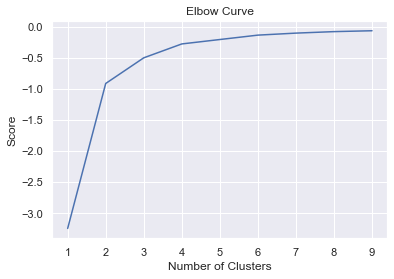

In [7]:
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig('elbow_curve.png')
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:2]]) # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:2]]) # Labels of each point
X.head(10)

,latitude,longitude,cluster_label
0,22.341544,114.133832,1
1,22.415166,114.223005,0
2,22.412407,113.983710,2
3,22.428605,114.243090,0
4,22.428605,114.243090,0
5,22.289202,114.197324,3
6,22.341544,114.133832,1
7,22.412407,113.983710,2
8,22.304938,114.160669,3
9,22.304938,114.160669,3


In [9]:
centers

array([[114.23724199],
       [114.13673885],
       [113.97385556],
       [114.17992336]])

In [29]:
import matplotlib as mpl
dpi = 300
mpl.rcParams['figure.dpi']= dpi

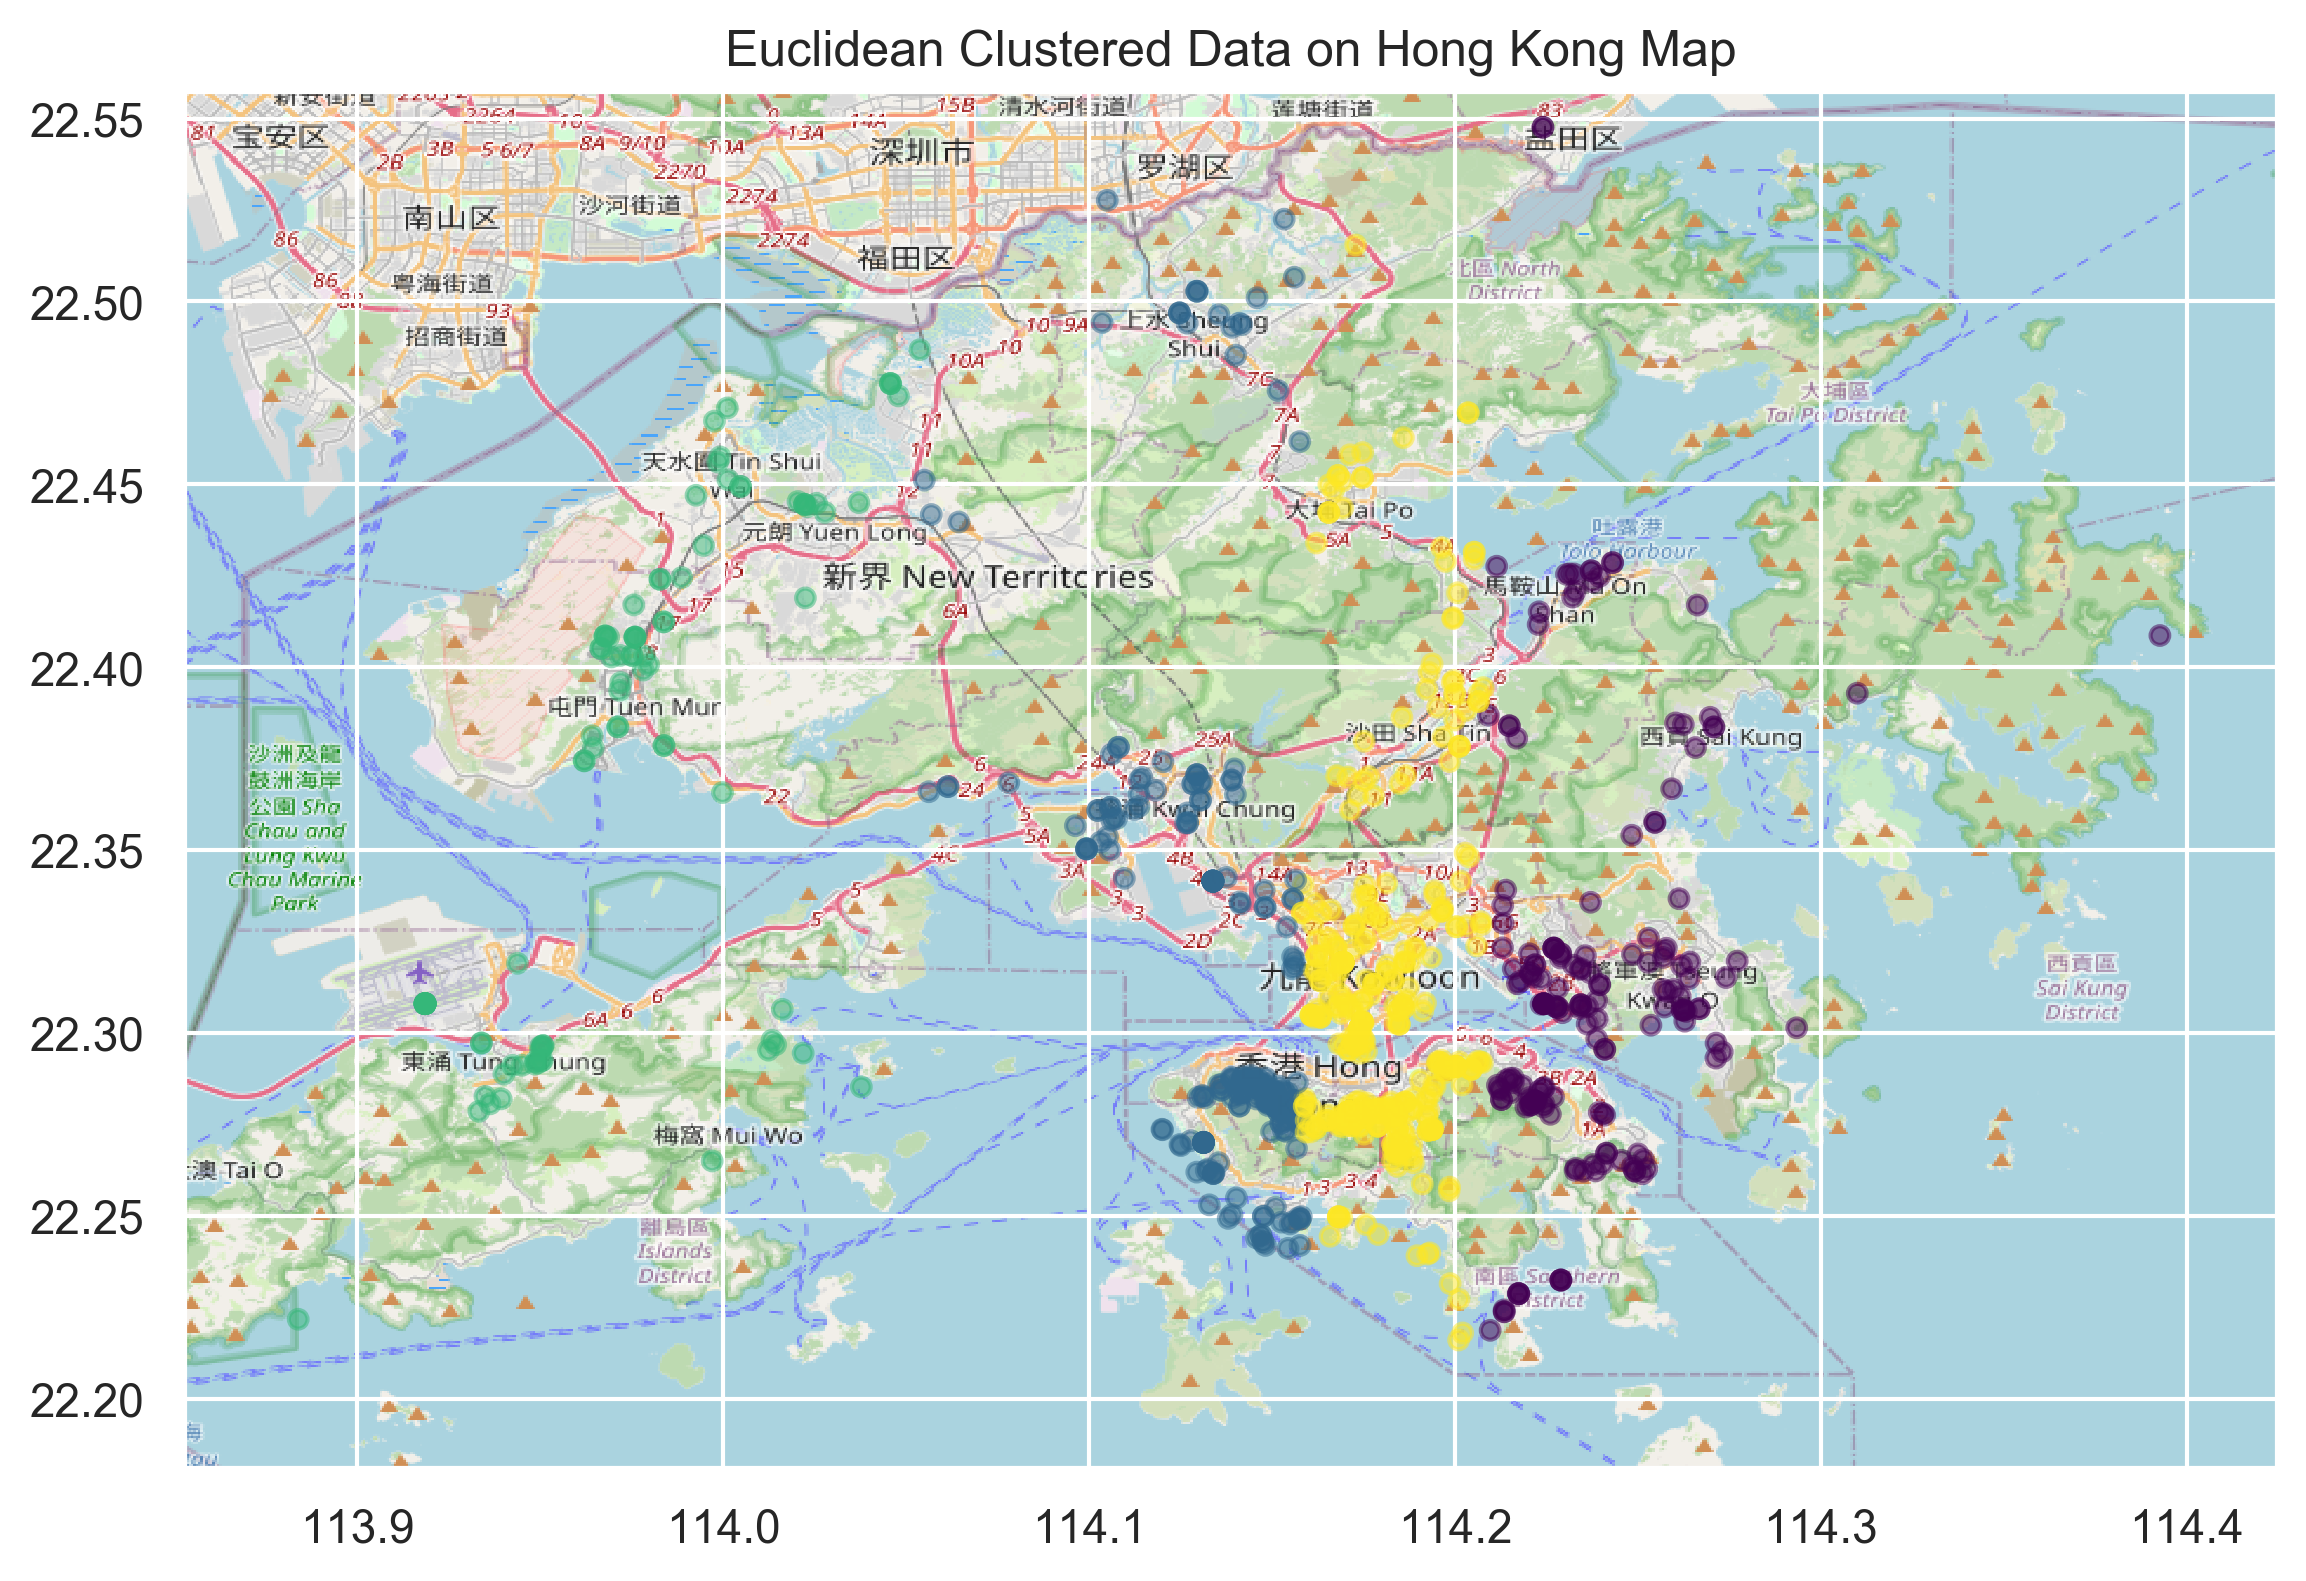

In [48]:
BBoxOpen =(113.8527, 114.4247, 22.1810, 22.5576)
ruh_m = plt.imread('map.png')
fig, ax = plt.subplots(figsize = (9,8))
ax.scatter(X.longitude, X.latitude, zorder=1, alpha= 0.5, c= labels, s=20, cmap='viridis')
# plt.scatter(centers[:, 0],centers[:, 1], c='black', s=20, alpha=0.5)
ax.set_title('Euclidean Clustered Data on Hong Kong Map')
ax.set_xlim(BBoxOpen[0],BBoxOpen[1])
ax.set_ylim(BBoxOpen[2],BBoxOpen[3])
ax.imshow(ruh_m, zorder=0, extent = BBoxOpen, aspect= 'equal')

In [51]:
X = X[['cluster_label']]
X.head(5)

,cluster_label
0,1
1,0
2,2
3,0
4,0


In [54]:
clustered_data = df.merge(X, left_index = True, right_index= True)
clustered_data.head()

,Unnamed: 0,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,...,Geocode,Occupation,Travel History,Relationship with other patients,Remarks,Cluster,Combined Address,latitude,longitude,cluster_label
0,0,1,23/1/2020,21/1/2020,M,39,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,"(22.3415435, 114.1338324)",NaN,NaN,NaN,NaN,NaN,Princess Margaret Hospital Kwai Tsing Hong Kong,22.341544,114.133832,1
1,1,2,23/1/2020,18/1/2020,M,56,Princess Margaret Hospital,Discharged,HK resident,Imported,...,"(22.4151657, 114.2230053)",NaN,NaN,NaN,NaN,NaN,"Tower 1A, Oceanaire Shatin Hong Kong",22.415166,114.223005,0
2,2,3,24/1/2020,20/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,"(22.412407, 113.9837095)",NaN,NaN,NaN,NaN,NaN,South Hillcrest Tuen Mun Hong Kong,22.412407,113.983710,2
3,3,4,24/1/2020,23/1/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,"(22.428605, 114.2430898)",NaN,NaN,NaN,NaN,NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090,0
4,4,5,24/1/2020,23/1/2020,M,63,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,...,"(22.428605, 114.2430898)",NaN,NaN,NaN,NaN,NaN,"Tower 1, Lake Silver Shatin Hong Kong",22.428605,114.243090,0


In [55]:
clustered_data.to_csv ('clustered_data.csv', index=None, header = True)